In [1]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from imutils import paths
import numpy as np
import argparse
import cv2
#import imutils
import os
import pandas as pd
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from pickle import TRUE

define a method to extract image pixel values

In [2]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	binary = image < threshold_otsu(image)
	binary = closing(binary)
	return cv2.resize(gray_scale, size).flatten()

define a method to extract color histogram 

In [3]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	#binary = image < threshold_otsu(image)
	#binary = closing(binary)
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	
	cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

define a method to extract image org features

In [4]:
def org_feature(image):
    # Applying the function
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures=2000)
    
    #binary = gray_scale < threshold_otsu(gray_scale)
    #binary = closing(binary)
    
    kp, des = orb.detectAndCompute(image, None) 
    # Drawing the keypoints
    kp_image = cv2.drawKeypoints(gray_scale, kp, None, color=(0, 255, 0), flags=0)
    #cv2.normalize(kp_image, kp_image)
    return kp_image.flatten()

define a method to calculate mean

In [5]:
from statistics import mean
def Average(lst):
    return mean(lst)

In [6]:
 # get the filenames of the leaves under the directory “Leaves”
 image_path_list = os.listdir("bananas_cropped")


In [7]:
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []
org_fe=[]
sift=[]

In [8]:
for i in range(len(image_path_list)):
	# load the image and extract the class label (assuming that our
	# path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image_path = image_path_list[i]
	#image = rgb2gray(imread("bananas_cropped/"+image_path))
	image = cv2.imread("bananas_cropped/"+image_path)
	label = image_path[0:14]
	# extract raw pixel intensity "features", followed by a color
	# histogram to characterize the color distribution of the pixels
	# in the image
	
	org=org_feature(image)
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)
	#sift_fe=SIFT_Feature(image)
	# update the raw images, features, and labels matricies,
	# respectively
	rawImages.append(pixels)
	features.append(hist)
	org_fe.append(Average(org))
	#sift.append(Average(sift_fe))
	labels.append(label)
	# show an update every 1,000 images
	

C:\Users\DELL\AppData\Local\Temp\ipykernel_13236\3962735422.py:5: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (750, 600, 3) looks like that of an RGB image.
  binary = image < threshold_otsu(image)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13236\3962735422.py:5: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (500, 700, 3) looks like that of an RGB image.
  binary = image < threshold_otsu(image)


Create dataframes to store extracted features

In [ ]:
df_raw_images = pd.DataFrame(rawImages)
df_hist=pd.DataFrame(hist)
df_sift=pd.DataFrame(sift)
df_org=pd.DataFrame(org_fe)
df_img=pd.DataFrame(labels)

merge pixels feature dataframe with org

In [ ]:
df_feature_1=pd.merge(df_raw_images,df_org,left_index=True, right_index=True)

In [ ]:
df_feature_1.info(verbose=TRUE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 1025 columns):
 #     Column  Dtype
---    ------  -----
 0     0_x     int8 
 1     1       int8 
 2     2       int8 
 3     3       int8 
 4     4       int8 
 5     5       int8 
 6     6       int8 
 7     7       int8 
 8     8       int8 
 9     9       int8 
 10    10      int8 
 11    11      int8 
 12    12      int8 
 13    13      int8 
 14    14      int8 
 15    15      int8 
 16    16      int8 
 17    17      int8 
 18    18      int8 
 19    19      int8 
 20    20      int8 
 21    21      int8 
 22    22      int8 
 23    23      int8 
 24    24      int8 
 25    25      int8 
 26    26      int8 
 27    27      int8 
 28    28      int8 
 29    29      int8 
 30    30      int8 
 31    31      int8 
 32    32      int8 
 33    33      int8 
 34    34      int8 
 35    35      int8 
 36    36      int8 
 37    37      int8 
 38    38      int8 
 39    39      int8 
 40    40  

Rename column 0_x and 0_y 

In [ ]:
df_feature_1.rename(columns = {'0_x':'0_x1', '0_y':'0_y1'}, inplace = True)

In [ ]:
df_hist


,0
0,0.008224
1,0.002263
2,0.002131
3,0.002528
4,0.002565
...,...
507,0.000000
508,0.000000
509,0.000000
510,0.000000


In [ ]:
df_feature_1

,0_x1,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,0_y1
0,-21,-21,-24,55,80,101,71,64,99,95,...,-64,25,19,65,-91,92,65,37,114,81
1,-30,52,44,53,-25,56,66,57,71,68,...,-104,22,70,17,72,-100,20,25,59,80
2,68,44,40,42,55,-117,-28,-28,-29,-20,...,45,21,31,17,34,25,85,24,16,85
3,44,-44,36,40,52,-69,-26,-29,-28,-20,...,25,35,43,22,17,33,87,17,10,85
4,-12,61,60,63,-21,-22,96,72,58,62,...,-127,39,68,27,29,81,15,20,43,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,54,13,49,57,72,61,34,6,37,43,...,37,15,87,67,104,20,30,20,17,47
418,21,98,12,62,49,36,22,47,50,46,...,13,51,17,36,71,32,37,57,17,47
419,16,92,16,67,33,38,21,67,49,44,...,21,84,11,16,26,26,37,26,17,47
420,96,15,46,75,65,80,35,70,33,59,...,41,13,33,73,103,20,25,35,17,47


Merge datafame feature 1 with dataframe for color histogram 

In [ ]:
df_feature_1=pd.merge(df_feature_1,df_hist,left_index=True, right_index=True)

In [ ]:
df_feature_1.info(verbose=TRUE)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 421
Data columns (total 1026 columns):
 #     Column  Dtype  
---    ------  -----  
 0     0_x1    int8   
 1     1       int8   
 2     2       int8   
 3     3       int8   
 4     4       int8   
 5     5       int8   
 6     6       int8   
 7     7       int8   
 8     8       int8   
 9     9       int8   
 10    10      int8   
 11    11      int8   
 12    12      int8   
 13    13      int8   
 14    14      int8   
 15    15      int8   
 16    16      int8   
 17    17      int8   
 18    18      int8   
 19    19      int8   
 20    20      int8   
 21    21      int8   
 22    22      int8   
 23    23      int8   
 24    24      int8   
 25    25      int8   
 26    26      int8   
 27    27      int8   
 28    28      int8   
 29    29      int8   
 30    30      int8   
 31    31      int8   
 32    32      int8   
 33    33      int8   
 34    34      int8   
 35    35      int8   
 36    36      int8

In [ ]:
df_feature_1.head

<bound method NDFrame.head of      0_x1   1   2   3   4    5   6   7   8   9  ...  1016  1017  1018  1019  \
0     -21 -21 -24  55  80  101  71  64  99  95  ...    25    19    65   -91   
1     -30  52  44  53 -25   56  66  57  71  68  ...    22    70    17    72   
2      68  44  40  42  55 -117 -28 -28 -29 -20  ...    21    31    17    34   
3      44 -44  36  40  52  -69 -26 -29 -28 -20  ...    35    43    22    17   
4     -12  61  60  63 -21  -22  96  72  58  62  ...    39    68    27    29   
..    ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ...   ...   ...   ...   ...   
417    54  13  49  57  72   61  34   6  37  43  ...    15    87    67   104   
418    21  98  12  62  49   36  22  47  50  46  ...    51    17    36    71   
419    16  92  16  67  33   38  21  67  49  44  ...    84    11    16    26   
420    96  15  46  75  65   80  35  70  33  59  ...    13    33    73   103   
421    84  19  61  82  37   72  60  18  52  40  ...    18    31    36   121   

     1020  1021  1022

Merge dataframe 1 with df_img 

In [ ]:
df_feature=pd.merge(df_img,df_feature_1,left_index=True, right_index=True)

In [ ]:
df_feature.head

<bound method NDFrame.head of                 0_x  0_x1   1   2   3   4    5   6   7   8  ...  1016  1017  \
0     Bananas_1.jpg   -21 -21 -24  55  80  101  71  64  99  ...    25    19   
1    Bananas_10.jpg   -30  52  44  53 -25   56  66  57  71  ...    22    70   
2    Bananas_100.jp    68  44  40  42  55 -117 -28 -28 -29  ...    21    31   
3    Bananas_101.jp    44 -44  36  40  52  -69 -26 -29 -28  ...    35    43   
4    Bananas_102.jp   -12  61  60  63 -21  -22  96  72  58  ...    39    68   
..              ...   ...  ..  ..  ..  ..  ...  ..  ..  ..  ...   ...   ...   
417  Cassava_95.jpg    54  13  49  57  72   61  34   6  37  ...    15    87   
418  Cassava_96.jpg    21  98  12  62  49   36  22  47  50  ...    51    17   
419  Cassava_97.jpg    16  92  16  67  33   38  21  67  49  ...    84    11   
420  Cassava_98.jpg    96  15  46  75  65   80  35  70  33  ...    13    33   
421  Cassava_99.jpg    84  19  61  82  37   72  60  18  52  ...    18    31   

     1018  1019  1020

In [ ]:
df_feature.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 1027 columns):
 #     Column  Dtype  
---    ------  -----  
 0     0_x     object 
 1     0_x1    int8   
 2     1       int8   
 3     2       int8   
 4     3       int8   
 5     4       int8   
 6     5       int8   
 7     6       int8   
 8     7       int8   
 9     8       int8   
 10    9       int8   
 11    10      int8   
 12    11      int8   
 13    12      int8   
 14    13      int8   
 15    14      int8   
 16    15      int8   
 17    16      int8   
 18    17      int8   
 19    18      int8   
 20    19      int8   
 21    20      int8   
 22    21      int8   
 23    22      int8   
 24    23      int8   
 25    24      int8   
 26    25      int8   
 27    26      int8   
 28    27      int8   
 29    28      int8   
 30    29      int8   
 31    30      int8   
 32    31      int8   
 33    32      int8   
 34    33      int8   
 35    34      int8   
 36    35      int8

In [ ]:
df_feature.describe()

,0_x1,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,0_y1,0_y
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,...,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,23.507109,30.289100,31.376777,41.898104,18.758294,31.561611,44.066351,50.350711,46.964455,50.959716,...,26.765403,34.379147,35.319905,37.462085,46.976303,41.952607,38.293839,41.315166,66.222749,0.015621
std,51.056428,42.910245,41.274963,43.319139,60.511779,55.879194,58.709036,52.267631,38.997243,48.235919,...,42.464007,33.086848,44.904698,45.979984,38.299413,40.437249,46.498322,42.633306,15.569251,0.046159
min,-123.000000,-126.000000,-128.000000,-127.000000,-127.000000,-125.000000,-128.000000,-127.000000,-128.000000,-127.000000,...,-126.000000,-120.000000,-127.000000,-128.000000,-127.000000,-127.000000,-128.000000,-125.000000,46.000000,0.000000
25%,-23.000000,15.000000,20.000000,26.250000,-22.000000,-20.750000,30.250000,31.250000,29.000000,25.000000,...,18.000000,20.000000,21.000000,22.000000,27.000000,23.000000,21.000000,23.000000,51.000000,0.000000
50%,26.000000,30.000000,35.000000,51.000000,29.000000,39.500000,60.000000,63.000000,55.000000,62.000000,...,25.000000,30.000000,35.000000,39.000000,44.000000,37.000000,36.000000,39.000000,66.000000,0.000057
75%,62.750000,57.000000,55.000000,62.000000,58.750000,70.750000,77.000000,81.000000,69.000000,83.000000,...,44.000000,49.000000,59.750000,64.000000,71.750000,65.000000,65.000000,66.750000,81.000000,0.005560
max,127.000000,125.000000,125.000000,125.000000,127.000000,127.000000,127.000000,126.000000,126.000000,127.000000,...,119.000000,127.000000,126.000000,127.000000,127.000000,125.000000,127.000000,127.000000,91.000000,0.386261


define a methed to assign class to the dataset

In [ ]:
def image_class (row):
   if 'Banana' in row['0_x'] :
      return '1'
   if 'Cassava' in row['0_x'] :
      return '0'
   return 2

apply the class label to dataset 1 for banana and 0 for cassava

In [ ]:
df_feature['class_label'] = df_feature.apply (lambda row: image_class(row), axis=1)

In [ ]:
df_feature.head

<bound method NDFrame.head of                 0_x  0_x1   1   2   3   4    5   6   7   8  ...  1017  1018  \
0     Bananas_1.jpg   -21 -21 -24  55  80  101  71  64  99  ...    19    65   
1    Bananas_10.jpg   -30  52  44  53 -25   56  66  57  71  ...    70    17   
2    Bananas_100.jp    68  44  40  42  55 -117 -28 -28 -29  ...    31    17   
3    Bananas_101.jp    44 -44  36  40  52  -69 -26 -29 -28  ...    43    22   
4    Bananas_102.jp   -12  61  60  63 -21  -22  96  72  58  ...    68    27   
..              ...   ...  ..  ..  ..  ..  ...  ..  ..  ..  ...   ...   ...   
417  Cassava_95.jpg    54  13  49  57  72   61  34   6  37  ...    87    67   
418  Cassava_96.jpg    21  98  12  62  49   36  22  47  50  ...    17    36   
419  Cassava_97.jpg    16  92  16  67  33   38  21  67  49  ...    11    16   
420  Cassava_98.jpg    96  15  46  75  65   80  35  70  33  ...    33    73   
421  Cassava_99.jpg    84  19  61  82  37   72  60  18  52  ...    31    36   

     1019  1020  1021

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plotting to see if class is balance

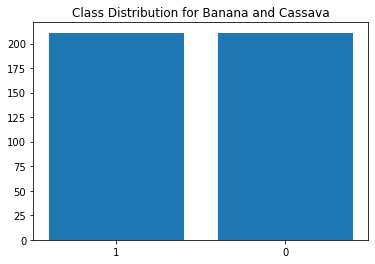

In [ ]:
plt.title('Class Distribution for Banana and Cassava')
plt.bar(df_feature['class_label'].value_counts().index, df_feature['class_label'].value_counts().values)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
#Standardizing the Input Features
from sklearn.preprocessing import StandardScaler

define X and Y values and split dataset into 80:20

In [ ]:
y = df_feature['class_label']
X = df_feature.drop('class_label', axis = 1)
X = df_feature.drop('0_x', axis = 1)

scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state = 125)
# Splitting the data into training and testing data

In [ ]:
X

,0_x1,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,0_y1,0_y,class_label
0,-21,-21,-24,55,80,101,71,64,99,95,...,19,65,-91,92,65,37,114,81,0.008224,1
1,-30,52,44,53,-25,56,66,57,71,68,...,70,17,72,-100,20,25,59,80,0.002263,1
2,68,44,40,42,55,-117,-28,-28,-29,-20,...,31,17,34,25,85,24,16,85,0.002131,1
3,44,-44,36,40,52,-69,-26,-29,-28,-20,...,43,22,17,33,87,17,10,85,0.002528,1
4,-12,61,60,63,-21,-22,96,72,58,62,...,68,27,29,81,15,20,43,81,0.002565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,54,13,49,57,72,61,34,6,37,43,...,87,67,104,20,30,20,17,47,0.000000,0
418,21,98,12,62,49,36,22,47,50,46,...,17,36,71,32,37,57,17,47,0.000000,0
419,16,92,16,67,33,38,21,67,49,44,...,11,16,26,26,37,26,17,47,0.000000,0
420,96,15,46,75,65,80,35,70,33,59,...,33,73,103,20,25,35,17,47,0.000000,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
#KNeighborsClassifier(...)
k_pred=neigh.predict(X_test)
print(k_pred)

['0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1'
 '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1'
 '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1'
 '0' '0' '0' '0' '1' '1' '0' '1' '1' '0' '1' '0' '0']


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
print(f"Test Accuracy: {np.mean(neigh.score(X_test,y_test))*100:.2f}%")

Test Accuracy: 97.65%


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    classifier= KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
  
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)
    
    
    K.append(k)
  
    training.append(train_score)
    test.append(test_score)
    scores[k] = [train_score, test_score]

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)

2 : [1.0, 1.0]
3 : [0.9792284866468842, 0.9882352941176471]
4 : [0.9851632047477745, 0.9882352941176471]
5 : [0.9792284866468842, 0.9764705882352941]
6 : [0.9792284866468842, 0.9764705882352941]
7 : [0.9614243323442137, 0.9647058823529412]
8 : [0.9673590504451038, 0.9647058823529412]
9 : [0.9525222551928784, 0.9647058823529412]
10 : [0.9584569732937686, 0.9647058823529412]
11 : [0.9317507418397626, 0.9529411764705882]
12 : [0.9406528189910979, 0.9529411764705882]
13 : [0.913946587537092, 0.9058823529411765]
14 : [0.9198813056379822, 0.9176470588235294]
15 : [0.8813056379821959, 0.8823529411764706]
16 : [0.8961424332344213, 0.8823529411764706]
17 : [0.8694362017804155, 0.8588235294117647]
18 : [0.8753709198813057, 0.8705882352941177]
19 : [0.8397626112759644, 0.8470588235294118]
20 : [0.8456973293768546, 0.8470588235294118]


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


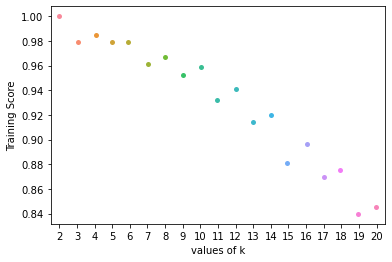

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()


In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Testing Score')

plt.show()


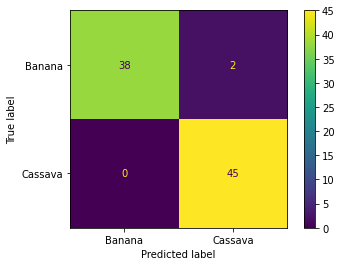

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_names=['Banana','Cassava']

cm=confusion_matrix(y_test, k_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

Classification Matrix

In [ ]:
from sklearn.metrics import classification_report
#print confusion matrix of test set
print(classification_report(neigh.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.96      0.98        47

    accuracy                           0.98        85
   macro avg       0.97      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
